## Machine Learning 12: Multiple Linear Regression

**Multiple Linear Regression (MLR)** is a statistical technique used to model the relationship between one **dependent variable** and **two or more independent variables**. It's an extension of simple linear regression, which involves only one independent variable.

---

### 📘 **Definition:**

Multiple Linear Regression estimates the relationship using the following general form:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \varepsilon
$$

Where:

* $Y$: Dependent (response) variable
* $X_1, X_2, ..., X_n$: Independent (predictor) variables
* $\beta_0$: Intercept
* $\beta_1, \beta_2, ..., \beta_n$: Coefficients for the independent variables
* $\varepsilon$: Error term

---

### 🔍 **Objective:**

To find the best-fitting linear relationship between the dependent variable and a set of independent variables by minimizing the **sum of squared residuals (errors)**.

---

### ✅ **Assumptions of Multiple Linear Regression:**

1. **Linearity** – The relationship between predictors and outcome is linear.
2. **Independence** – Observations are independent of each other.
3. **Homoscedasticity** – Constant variance of the residuals.
4. **Normality** – Residuals are normally distributed.
5. **No multicollinearity** – Independent variables are not highly correlated with each other.

---

### 🛠️ **Applications:**

* Predicting sales based on advertising spend across multiple media.
* Estimating house prices based on size, location, and number of rooms.
* Determining the effect of education and experience on salary.

---

### 📈 **Output Interpretation:**

* **Coefficients**: Show how much the dependent variable is expected to increase (or decrease) when the independent variable increases by one unit.
* **R² (R-squared)**: Measures the proportion of variance in the dependent variable explained by the independent variables.
* **p-values**: Test the significance of each predictor.

---

In [1]:
# 1. Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 2. Reading and Inspecting the Dataset

dataset =pd.read_csv("salary.csv")
dataset.head(3)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580


In [3]:
dataset.isnull().sum()

age           0
experience    0
income        0
dtype: int64

- Checks for missing values. All columns have 0 nulls.

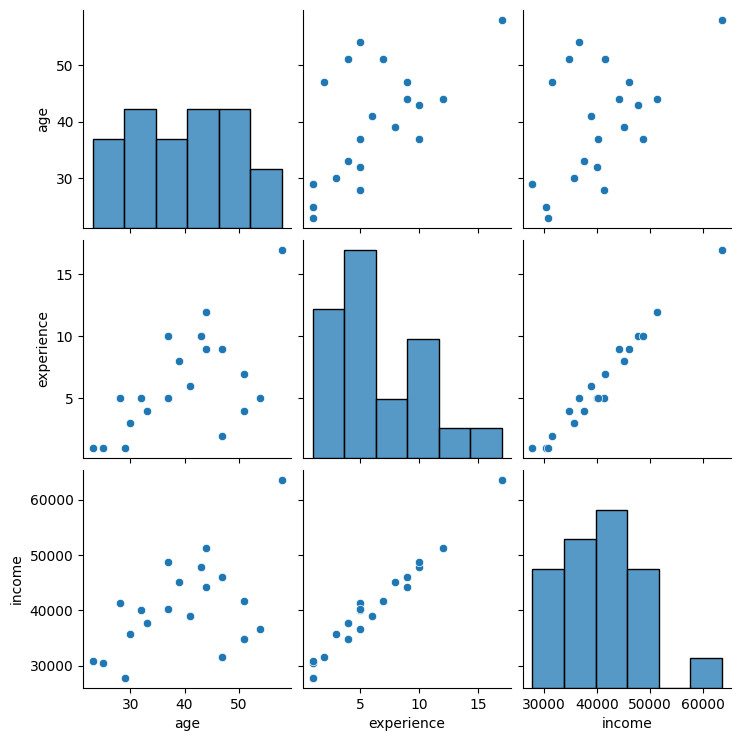

In [4]:
# 3. Data Visualization

sns.pairplot(data=dataset)
plt.show()

- Shows pairwise plots between age, experience, and income.

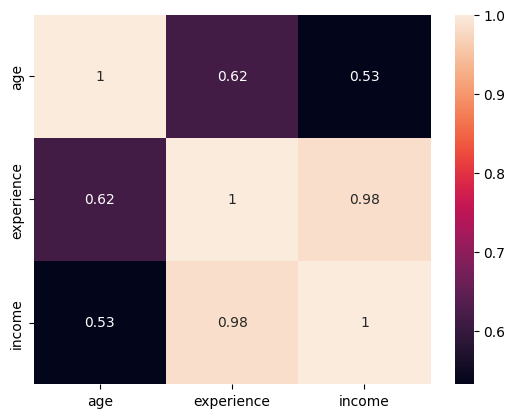

In [5]:
sns.heatmap(data=dataset.corr(),annot = True)
plt.show()

- Displays a correlation matrix heatmap with values annotated

In [6]:
# Features (X) and Target (y)

x = dataset.iloc[:,:-1]   # Features: age, experience
y = dataset["income"]   # Target: income

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Split dataset into training & testing sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [9]:
# 5. Model Training (Linear Regression)

from sklearn.linear_model import LinearRegression

In [10]:
# Create model and train

model = LinearRegression()

In [11]:
model.fit(x_train, y_train)

LinearRegression()

In [12]:
model.score(x_test,y_test)*100

93.87098237077886

- Model accuracy: 93.87% (based on R² score on test set).

In [13]:
# Predictions
y_pred = model.predict(x_test)
y_pred

array([31093.38107376, 31295.49954076, 40250.46080162, 34897.6958918 ])

In [14]:
# Model evaluation
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Intercept: 31465.056418503933
Coefficients: [-101.0592335  2154.80549277]
Mean Squared Error (MSE): 753796.7693734544
R² Score: 0.9387098237077887


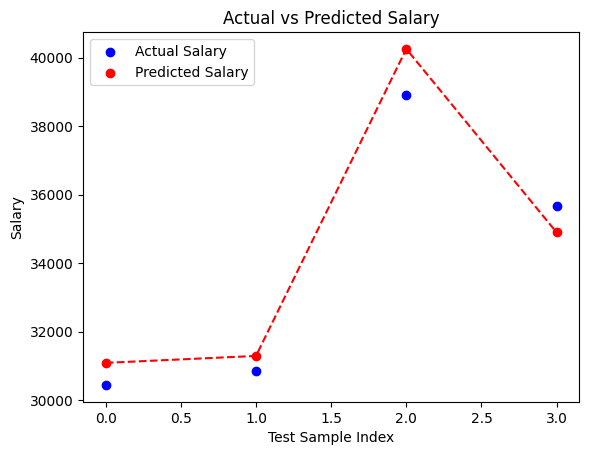

In [19]:
# Plot actual vs predicted salaries
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Salary')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Salary')
plt.plot(range(len(y_pred)), y_pred, color='red', linestyle='dashed')  # Connect prediction points

plt.xlabel('Test Sample Index')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()
